<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/assignment_20_timers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

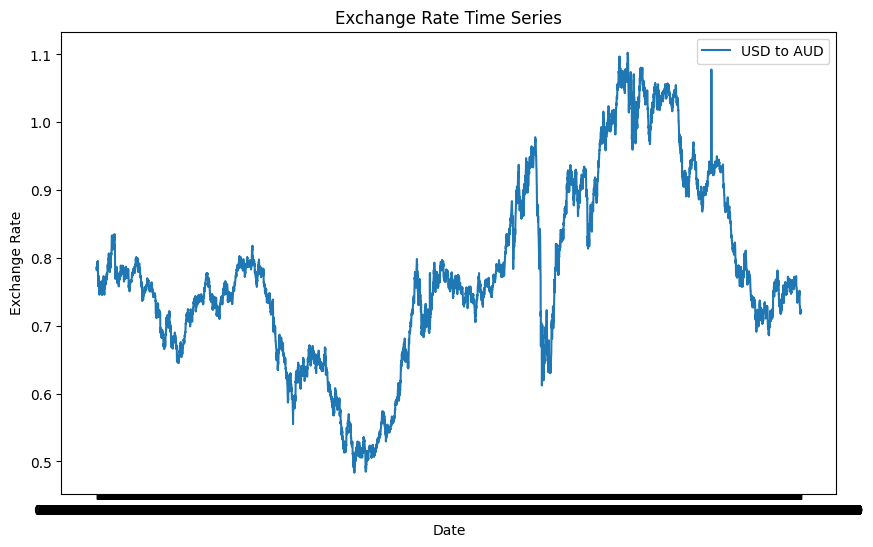

Missing values:
Ex_rate    0
dtype: int64


<ipython-input-14-711b1a8e9caa>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Check the column name for the date in your CSV file.
# It might be 'date', 'DATE', etc. Update accordingly.
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

# Initial Exploration
plt.figure(figsize=(10,6))
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
plt.plot(data['Ex_rate'], label='USD to AUD')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

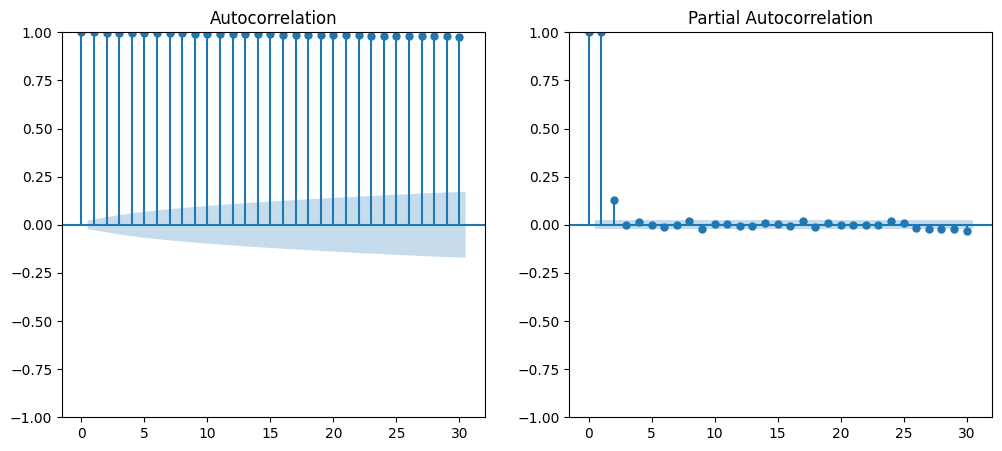

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(121)
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
plot_acf(data['Ex_rate'], lags=30, ax=plt.gca())
plt.subplot(122)
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
plot_pacf(data['Ex_rate'], lags=30, ax=plt.gca())
plt.show()

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


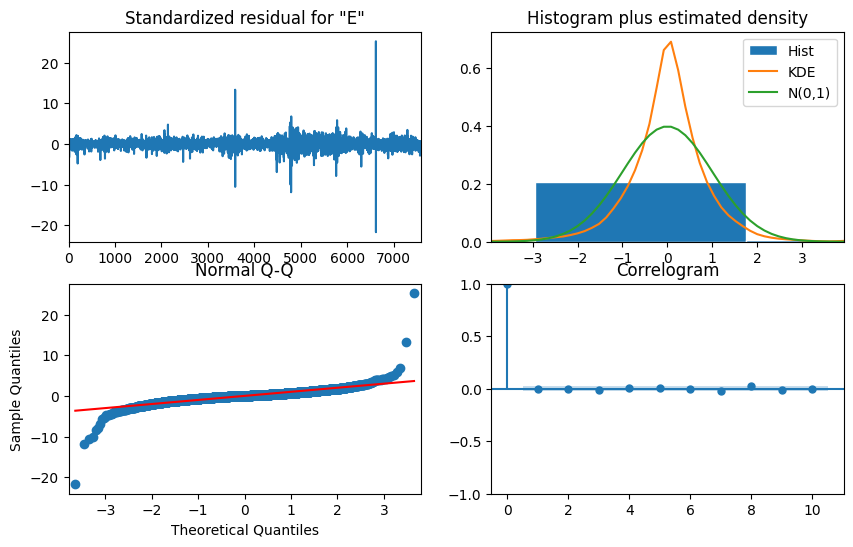

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


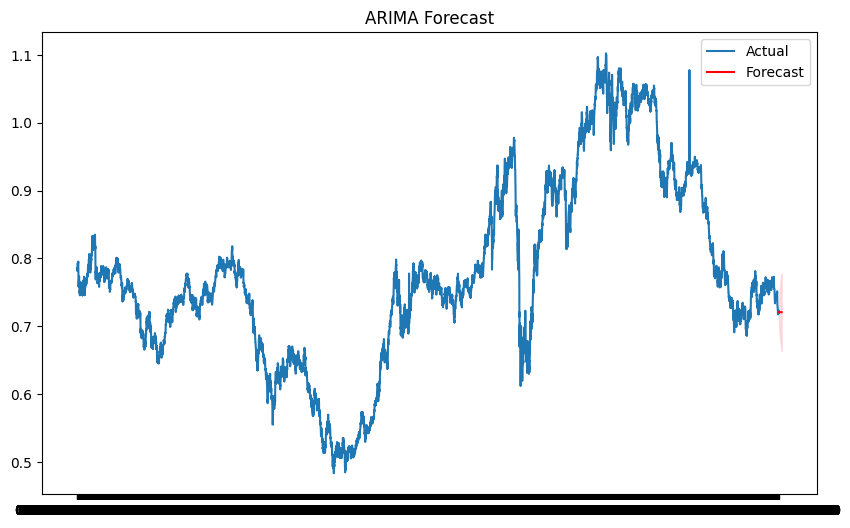

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check stationarity
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
adf_result = adfuller(data['Ex_rate'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Fit ARIMA model (p,d,q can be chosen based on ACF/PACF)
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
arima_model = ARIMA(data['Ex_rate'], order=(1,1,1)) # Example values for (p,d,q)
arima_result = arima_model.fit()

# Model Diagnostics
arima_result.plot_diagnostics(figsize=(10,6))
plt.show()

# Forecasting
forecast = arima_result.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot Forecast
plt.figure(figsize=(10,6))

# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index,
                 confidence_intervals.iloc[:,0],
                 confidence_intervals.iloc[:,1],
                 color='pink', alpha=0.5)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


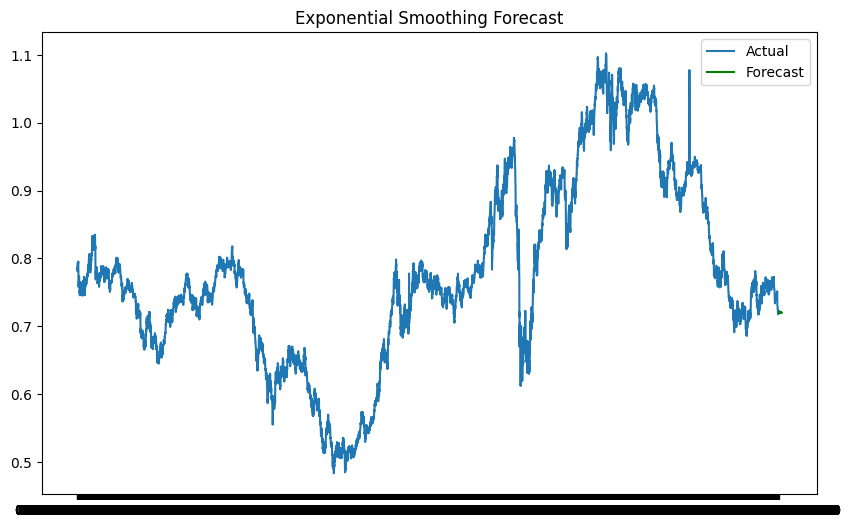

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model (Holt-Winters example with trend and seasonality)
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
es_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
es_result = es_model.fit()

# Forecasting
es_forecast = es_result.forecast(30)

# Plot Forecast
plt.figure(figsize=(10,6))

# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(es_forecast.index, es_forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ARIMA Evaluation
# Get the actual values for the forecasted period
actual_values = data['Ex_rate'][-len(forecast_values):]
mae_arima = mean_absolute_error(actual_values, forecast_values)
rmse_arima = mean_squared_error(actual_values, forecast_values, squared=False)

# Exponential Smoothing Evaluation
es_forecast_values = es_result.fittedvalues
# Changed 'USD_AUD' to 'Ex_rate' to match the column name in the DataFrame
mae_es = mean_absolute_error(data['Ex_rate'], es_forecast_values)
rmse_es = mean_squared_error(data['Ex_rate'], es_forecast_values, squared=False)

# Print evaluation metrics
print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"Exponential Smoothing MAE: {mae_es}, RMSE: {rmse_es}")

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing MAE: 0.0036915354942747354, RMSE: 0.00599359010407055
